In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from predict_humidity import *

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexes\base.py:920: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexes\base.py:920: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexes\base.py:920: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexes\base.py:920: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexes\base.py:920: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexes\base.py:920: RuntimeWarning: overflow encountered in

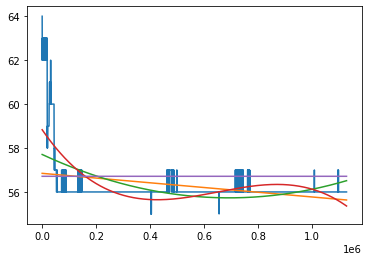

[                                  object_relativfrequenz  object_humidity  \
2022-02-11 17:25:46.023608+00:00                   223.0             44.6   
2022-02-11 17:27:48.583551+00:00                     0.0             44.6   

                                  object_pressure  object_temperature  
2022-02-11 17:25:46.023608+00:00           1017.7                22.6  
2022-02-11 17:27:48.583551+00:00           1017.8                22.7  ,                                   object_relativfrequenz  object_humidity  \
2022-02-11 17:34:40.489444+00:00                   244.0             43.6   
2022-02-11 17:37:08.714993+00:00                   244.0             43.7   
2022-02-11 17:39:36.933418+00:00                   244.0             43.8   
2022-02-11 17:42:05.150335+00:00                   244.0             44.0   
2022-02-11 17:44:33.382703+00:00                   244.0             44.0   
2022-02-11 17:47:01.604211+00:00                   244.0             44.0   
2022-02-11 

In [2]:
all_data = get_data().dropna()
relative_freq = all_data['object_relativfrequenz'].dropna()
changes = get_watering_sessions(relative_freq)
chunks = split_into_chunks(all_data, changes)
# visualize(chunks[-1])
reg_func_id = determine_regression_type(chunks)
print(chunks)

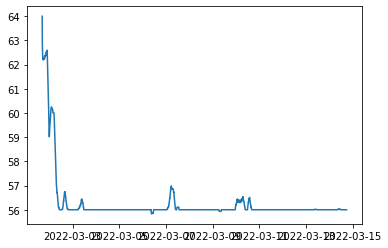

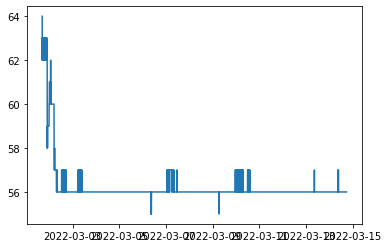

In [12]:
chunk = chunks[-1]
middle = chunk.rolling('8000s').mean()
visualize(middle)
visualize(chunk)

In [7]:
data = pd.read_csv('data/data_prev.csv')
data

,name,time,fCnt,fPort,host,object_batt,object_frequenz1,object_frequenz2,object_frequenz3,object_humidity,...,object_relativfrequenz,object_temperature,rxInfo_0_loRaSNR,rxInfo_0_location_altitude,rxInfo_0_location_latitude,rxInfo_0_location_longitude,rxInfo_0_rssi,topic,txInfo_dr,txInfo_frequency
0,mqtt_consumer,1642962993129676743,0,4,raspberrypi,4.2,NaN,NaN,NaN,49.8,...,NaN,21.1,10.8,216,51.039006,13.782436,-63,application/3/device/17e139c9c43b6a5d/event/up,5,868100000
1,mqtt_consumer,1642962999892599712,1,0,raspberrypi,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,216,51.039006,13.782436,-60,application/3/device/17e139c9c43b6a5d/event/up,0,868300000
2,mqtt_consumer,1642963115329148434,2,0,raspberrypi,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,216,51.039006,13.782436,-71,application/3/device/17e139c9c43b6a5d/event/up,0,868100000
3,mqtt_consumer,1642963230909153343,3,4,raspberrypi,4.2,NaN,NaN,NaN,49.6,...,NaN,21.4,8.0,216,51.039006,13.782436,-67,application/3/device/17e139c9c43b6a5d/event/up,0,867300000
4,mqtt_consumer,1642963316609983409,0,4,raspberrypi,4.2,NaN,NaN,NaN,49.8,...,NaN,21.2,9.8,216,51.039006,13.782436,-58,application/3/device/17e139c9c43b6a5d/event/up,5,868100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48716,mqtt_consumer,1648314616598693616,5,5,raspberrypi,4.2,NaN,244.0,63.0,34.4,...,NaN,22.1,10.8,216,51.039006,13.782436,-60,application/3/device/26ea3db70e1adbd4/event/up,0,867900000
48717,mqtt_consumer,1648314797390708626,6,5,raspberrypi,4.2,63.0,188.0,NaN,31.2,...,NaN,22.1,10.5,216,51.039006,13.782436,-63,application/3/device/26ea3db70e1adbd4/event/up,0,867100000
48718,mqtt_consumer,1648314978188606923,7,5,raspberrypi,4.2,1.0,NaN,75.0,31.4,...,NaN,22.0,8.8,216,51.039006,13.782436,-59,application/3/device/26ea3db70e1adbd4/event/up,0,868500000
48719,mqtt_consumer,1648315159010503078,8,5,raspberrypi,4.2,NaN,244.0,63.0,31.6,...,NaN,22.0,10.8,216,51.039006,13.782436,-60,application/3/device/26ea3db70e1adbd4/event/up,0,867300000


In [8]:
cleaned = data['object_relativfrequenz'].dropna()

In [5]:
cleaned

0       354.0
1       355.0
2       360.0
3       355.0
4        50.0
        ...  
3036      5.0
3037      5.0
3038      5.0
3039      5.0
3041      5.0
Name: object_frequenz, Length: 2951, dtype: float64

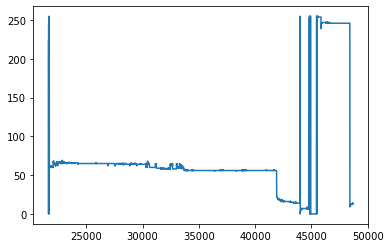

In [9]:
plt.plot(cleaned)